#Summarize your data with descriptie Stats

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Calculate summary statistics
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq',na_values= 'n/a')
market_cap = nasdaq['Market Capitalization'].div(10**6)

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [39]:
market_cap.mean()

3180.7126214953805

In [40]:
market_cap.median()

225.9684285

In [41]:
market_cap.mode()

0    0.0
dtype: float64

In [42]:
variance= market_cap.var()
print(variance)

648773812.8182561


In [43]:
std= market_cap.std()
print(std)

25471.038707093518


#Describe the Distribution of your data with quantiles

In [44]:
#Quantiles with pandas
market_cap= nasdaq['Market Capitalization'].div(10**6)
median = market_cap.quantile(.5)
median == market_cap.median()

True

In [45]:
quantiles = market_cap.quantile([.25,.75])
quantiles

0.25     43.375930
0.75    969.905207
Name: Market Capitalization, dtype: float64

In [46]:
quantiles[.75]- quantiles[.25] #interquantile Range

926.5292771575

In [47]:
deciles= np.arange(start=.1,stop=.91,step=.1)
deciles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [48]:
market_cap.quantile(deciles)

0.1       4.884565
0.2      26.993382
0.3      65.714547
0.4     124.320644
0.5     225.968428
0.6     402.469678
0.7     723.163197
0.8    1441.071134
0.9    3671.499558
Name: Market Capitalization, dtype: float64

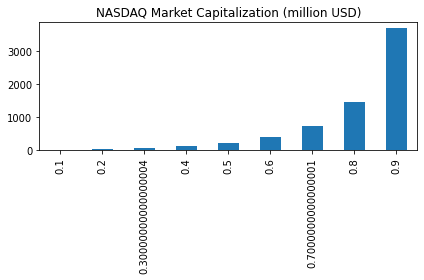

In [49]:
#Visualiz quantiles with bar chart
title = 'NASDAQ Market Capitalization (million USD)'
market_cap.quantile(deciles).plot(kind='bar',title=title)
plt.tight_layout();
plt.show()

In [50]:
#All Statistics in one go
market_cap.describe()

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
25%          43.375930
50%         225.968428
75%         969.905207
max      740024.467000
Name: Market Capitalization, dtype: float64

In [51]:
market_cap.describe(percentiles=np.arange(.1,.91,.1))

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
10%           4.884565
20%          26.993382
30%          65.714547
40%         124.320644
50%         225.968428
60%         402.469678
70%         723.163197
80%        1441.071134
90%        3671.499558
max      740024.467000
Name: Market Capitalization, dtype: float64

#Visualize the Distribution of your data

In [52]:
#10 years treasury: Trend and distribution
from pandas_datareader import data as wb
from datetime import date
ty10= wb.DataReader('DGS10','fred',date(1962,1,1))
ty10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15943 entries, 1962-01-02 to 2023-02-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   15262 non-null  float64
dtypes: float64(1)
memory usage: 249.1 KB


In [53]:
ty10.describe()

,DGS10
count,15262.000000
mean,5.898091
std,2.986845
min,0.520000
25%,3.860000
50%,5.680000
75%,7.650000
max,15.840000


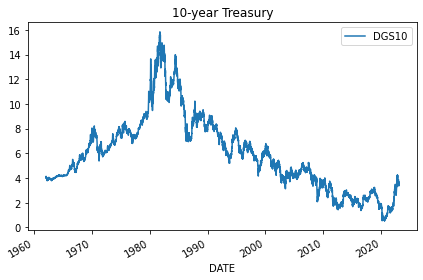

In [54]:
#Time Series Trend
ty10.dropna(inplace=True) # Avoid Creation of Copy
ty10.plot(title='10-year Treasury')
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


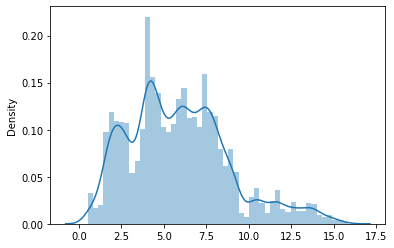

In [55]:
#Historical Distribution
sns.distplot(ty10)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


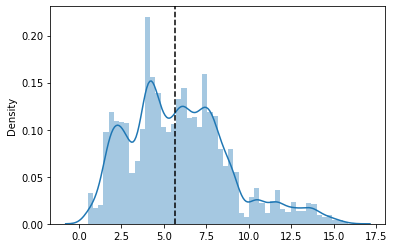

In [56]:
ax= sns.distplot(ty10)
ax.axvline(ty10['DGS10'].median(),color='black',ls='--')

#Summarize Categorical Variable

In [63]:
amex = pd.read_excel('listings.xlsx',sheet_name= 'amex',na_values=['n/a'])
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           360 non-null    object 
 1   Company Name           360 non-null    object 
 2   Last Sale              346 non-null    float64
 3   Market Capitalization  360 non-null    float64
 4   IPO Year               105 non-null    float64
 5   Sector                 238 non-null    object 
 6   Industry               238 non-null    object 
dtypes: float64(3), object(4)
memory usage: 19.8+ KB


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [64]:
amex['Sector'].nunique()

12

In [68]:
amex.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


In [70]:
#how many observations per sector?
amex['Sector'].value_counts()

Health Care              49
Basic Industries         44
Energy                   28
Consumer Services        27
Capital Goods            24
Technology               20
Consumer Non-Durables    13
Finance                  12
Public Utilities         11
Miscellaneous             5
Consumer Durables         4
Transportation            1
Name: Sector, dtype: int64

In [71]:
#How many IPOs per Year?
amex['IPO Year'].value_counts()

2002.0    19
2015.0    11
1999.0     9
1993.0     7
2014.0     6
2004.0     5
2017.0     5
2003.0     5
2013.0     5
1992.0     4
2005.0     3
2016.0     3
2011.0     3
1986.0     3
2007.0     3
2006.0     3
1998.0     2
1988.0     2
1997.0     2
1987.0     1
1991.0     1
1990.0     1
2009.0     1
1996.0     1
Name: IPO Year, dtype: int64

In [72]:
#Convert IPO Year to int
ipo_by_yr =amex['IPO Year'].dropna().astype(int).value_counts()
ipo_by_yr

2002    19
2015    11
1999     9
1993     7
2014     6
2004     5
2017     5
2003     5
2013     5
1992     4
2005     3
2016     3
2011     3
1986     3
2007     3
2006     3
1998     2
1988     2
1997     2
1987     1
1991     1
1990     1
2009     1
1996     1
Name: IPO Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

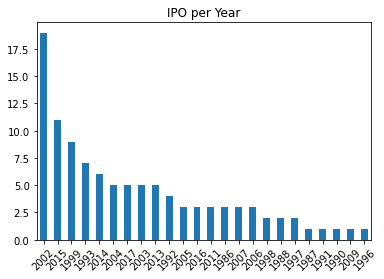

In [74]:
ipo_by_yr.plot(kind='bar',title = 'IPO per Year')
plt.xticks(rotation=45)